<a href="https://colab.research.google.com/github/moonisshakeel/Data-Manipulation-Visualization-and-Analysis/blob/master/electricity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
import csv
import numpy as np 
import datetime
#from DateTimeutil import parser

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
filename = r'/content/drive/MyDrive/NEMprice_FullData.csv'
import csv
open(filename)

<_io.TextIOWrapper name='/content/drive/MyDrive/NEMprice_FullData.csv' mode='r' encoding='UTF-8'>

In [5]:
print(filename)

/content/drive/MyDrive/NEMprice_FullData.csv


In [6]:
data=pd.read_csv('/content/drive/MyDrive/NEMprice_FullData.csv')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Date,Time,DateTime,NSW1,QLD1,SA1,VIC1,TAS1
0,1-Jan-99,0:30:00,1-Jan-99 0:30,27.64,19.34,36.01,30.52,.
1,1-Jan-99,1:00:00,1-Jan-99 1:00,26.64,17.47,35.7,28.74,.
2,1-Jan-99,1:30:00,1-Jan-99 1:30,25.81,17.08,31.67,27.94,.
3,1-Jan-99,2:00:00,1-Jan-99 2:00,19.94,15.84,22.42,20.9,.
4,1-Jan-99,2:30:00,1-Jan-99 2:30,19.48,15.68,21.38,20.26,.


In [7]:
data['DateTime'] = pd.to_datetime(data['DateTime'], format='%d-%b-%y %H:%M')
data.head()

,Date,Time,DateTime,NSW1,QLD1,SA1,VIC1,TAS1
0,1-Jan-99,0:30:00,1999-01-01 00:30:00,27.64,19.34,36.01,30.52,.
1,1-Jan-99,1:00:00,1999-01-01 01:00:00,26.64,17.47,35.7,28.74,.
2,1-Jan-99,1:30:00,1999-01-01 01:30:00,25.81,17.08,31.67,27.94,.
3,1-Jan-99,2:00:00,1999-01-01 02:00:00,19.94,15.84,22.42,20.9,.
4,1-Jan-99,2:30:00,1999-01-01 02:30:00,19.48,15.68,21.38,20.26,.


In [8]:
data = pd.DataFrame(data)

In [9]:
# delete the column
del data['TAS1']
del data['Date']
del data['Time']
data.head()

,DateTime,NSW1,QLD1,SA1,VIC1
0,1999-01-01 00:30:00,27.64,19.34,36.01,30.52
1,1999-01-01 01:00:00,26.64,17.47,35.7,28.74
2,1999-01-01 01:30:00,25.81,17.08,31.67,27.94
3,1999-01-01 02:00:00,19.94,15.84,22.42,20.9
4,1999-01-01 02:30:00,19.48,15.68,21.38,20.26


In [10]:
data['year'] = (data['DateTime']).dt.year
data['month'] = (data['DateTime']).dt.month
data['day'] = (data['DateTime']).dt.day
data['dayofyear'] = (data['DateTime']).dt.dayofyear
data['weekofyear'] = (data['DateTime']).dt.weekofyear
data['weekday'] = (data['DateTime']).dt.weekday
data['quarter'] = (data['DateTime']).dt.quarter
data['is_month_start'] = (data['DateTime']).dt.is_month_start
data['is_month_end'] = (data['DateTime']).dt.is_month_end
data['Hour'] = (data['DateTime']).dt.hour
data['minute'] = (data['DateTime']).dt.minute

data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


,DateTime,NSW1,QLD1,SA1,VIC1,year,month,day,dayofyear,weekofyear,weekday,quarter,is_month_start,is_month_end,Hour,minute
0,1999-01-01 00:30:00,27.64,19.34,36.01,30.52,1999,1,1,1,53,4,1,True,False,0,30
1,1999-01-01 01:00:00,26.64,17.47,35.7,28.74,1999,1,1,1,53,4,1,True,False,1,0
2,1999-01-01 01:30:00,25.81,17.08,31.67,27.94,1999,1,1,1,53,4,1,True,False,1,30
3,1999-01-01 02:00:00,19.94,15.84,22.42,20.9,1999,1,1,1,53,4,1,True,False,2,0
4,1999-01-01 02:30:00,19.48,15.68,21.38,20.26,1999,1,1,1,53,4,1,True,False,2,30


In [11]:
 data.dtypes

DateTime          datetime64[ns]
NSW1                      object
QLD1                      object
SA1                       object
VIC1                      object
year                       int64
month                      int64
day                        int64
dayofyear                  int64
weekofyear                 int64
weekday                    int64
quarter                    int64
is_month_start              bool
is_month_end                bool
Hour                       int64
minute                     int64
dtype: object

In [12]:
cols = ['NSW1', 'QLD1', 'SA1', 'VIC1']
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [13]:
data.dtypes

DateTime          datetime64[ns]
NSW1                     float64
QLD1                     float64
SA1                      float64
VIC1                     float64
year                       int64
month                      int64
day                        int64
dayofyear                  int64
weekofyear                 int64
weekday                    int64
quarter                    int64
is_month_start              bool
is_month_end                bool
Hour                       int64
minute                     int64
dtype: object

In [14]:
data = data.set_index('DateTime')

In [15]:
data = data.interpolate(method='linear')
print(data)

                       NSW1    QLD1    SA1   VIC1  year  month  day  \
DateTime                                                              
1999-01-01 00:30:00   27.64   19.34  36.01  30.52  1999      1    1   
1999-01-01 01:00:00   26.64   17.47  35.70  28.74  1999      1    1   
1999-01-01 01:30:00   25.81   17.08  31.67  27.94  1999      1    1   
1999-01-01 02:00:00   19.94   15.84  22.42  20.90  1999      1    1   
1999-01-01 02:30:00   19.48   15.68  21.38  20.26  1999      1    1   
...                     ...     ...    ...    ...   ...    ...  ...   
2021-05-31 21:30:00  242.12  226.75  56.44  53.22  2021      5   31   
2021-05-31 22:00:00  140.69  131.66  14.07  13.05  2021      5   31   
2021-05-31 22:30:00  280.59  249.25  22.54  22.41  2021      5   31   
2021-05-31 23:00:00  203.59  181.77   9.93  10.17  2021      5   31   
2021-05-31 23:30:00  231.41  209.58  12.06  12.77  2021      5   31   

                     dayofyear  weekofyear  weekday  quarter  is_month_start

In [16]:
data.isnull()

,NSW1,QLD1,SA1,VIC1,year,month,day,dayofyear,weekofyear,weekday,quarter,is_month_start,is_month_end,Hour,minute
DateTime,,,,,,,,,,,,,,,
1999-01-01 00:30:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1999-01-01 01:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1999-01-01 01:30:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1999-01-01 02:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1999-01-01 02:30:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31 21:30:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2021-05-31 22:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2021-05-31 22:30:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
print(data.isnull().sum())

NSW1              0
QLD1              0
SA1               0
VIC1              0
year              0
month             0
day               0
dayofyear         0
weekofyear        0
weekday           0
quarter           0
is_month_start    0
is_month_end      0
Hour              0
minute            0
dtype: int64


In [18]:
exportascsv=pd.DataFrame(data)

In [19]:
exportascsv.to_csv (r'C:\Users\user\Desktop\electricity\exportascsv.csv', index = False, header=True)
print (exportascsv)

                       NSW1    QLD1    SA1   VIC1  year  month  day  \
DateTime                                                              
1999-01-01 00:30:00   27.64   19.34  36.01  30.52  1999      1    1   
1999-01-01 01:00:00   26.64   17.47  35.70  28.74  1999      1    1   
1999-01-01 01:30:00   25.81   17.08  31.67  27.94  1999      1    1   
1999-01-01 02:00:00   19.94   15.84  22.42  20.90  1999      1    1   
1999-01-01 02:30:00   19.48   15.68  21.38  20.26  1999      1    1   
...                     ...     ...    ...    ...   ...    ...  ...   
2021-05-31 21:30:00  242.12  226.75  56.44  53.22  2021      5   31   
2021-05-31 22:00:00  140.69  131.66  14.07  13.05  2021      5   31   
2021-05-31 22:30:00  280.59  249.25  22.54  22.41  2021      5   31   
2021-05-31 23:00:00  203.59  181.77   9.93  10.17  2021      5   31   
2021-05-31 23:30:00  231.41  209.58  12.06  12.77  2021      5   31   

                     dayofyear  weekofyear  weekday  quarter  is_month_start

In [20]:
import matplotlib.pyplot as plt

In [27]:
# Applying min-max on attribute TAX
max_nsw = data["NSW1"].max()
min_nsw = data["NSW1"].min()
new_max = 1
new_min = 0
data["nsw"]=((data["NSW1"] - min_nsw)/(max_nsw - min_nsw))*(new_max-new_min) + new_min
data.head()

,NSW1,QLD1,SA1,VIC1,year,month,day,dayofyear,weekofyear,weekday,quarter,is_month_start,is_month_end,Hour,minute,nsw,nsw1,nsw_log
DateTime,,,,,,,,,,,,,,,,,,
1999-01-01 00:30:00,27.64,19.34,36.01,30.52,1999,1,1,1,53,4,1,True,False,0,30,0.011777,0.000276,-1.928955
1999-01-01 01:00:00,26.64,17.47,35.70,28.74,1999,1,1,1,53,4,1,True,False,1,0,0.011710,0.000266,-1.931445
1999-01-01 01:30:00,25.81,17.08,31.67,27.94,1999,1,1,1,53,4,1,True,False,1,30,0.011654,0.000258,-1.933524
1999-01-01 02:00:00,19.94,15.84,22.42,20.90,1999,1,1,1,53,4,1,True,False,2,0,0.011259,0.000199,-1.948513
1999-01-01 02:30:00,19.48,15.68,21.38,20.26,1999,1,1,1,53,4,1,True,False,2,30,0.011228,0.000195,-1.949710


In [26]:
data[["NSW1", "QLD1", "SA1", "VIC1"]].describe()

,NSW1,QLD1,SA1,VIC1
count,392953.000000,392953.000000,392953.000000,392953.000000
mean,47.929967,48.517116,55.977158,45.912887
std,181.861668,185.602085,253.030380,168.592168
min,-147.220000,-1000.000000,-996.700000,-676.370000
25%,23.000000,20.500000,24.890000,21.110000
50%,33.030000,30.690000,35.810000,31.610000
75%,51.790000,51.950000,55.790000,49.950000
max,14700.000000,15000.000000,14700.000000,14700.000000


In [55]:
mean_year=data[["NSW1", "QLD1", "SA1", "VIC1","year"]].groupby("year").mean()
mean_year = pd.DataFrame(mean_year)
mean_year.head()

,NSW1,QLD1,SA1,VIC1
year,,,,
1999,22.686718,41.737974,54.461853,22.546997
2000,35.633770,50.402663,56.939122,38.253447
2001,33.269876,34.967752,42.153546,36.009768
2002,39.760799,47.818733,35.342257,33.176166
2003,26.401067,22.532956,26.664027,23.102535


In [45]:
mean_month=data[["NSW1", "QLD1", "SA1", "VIC1","month"]].groupby("month").mean()

In [46]:
mean_weekofyear=data[["NSW1", "QLD1", "SA1", "VIC1","weekofyear"]].groupby("weekofyear").mean()

In [47]:
mean_weekday=data[["NSW1", "QLD1", "SA1", "VIC1","weekday"]].groupby("weekday").mean()

In [48]:
mean_quarter=data[["NSW1", "QLD1", "SA1", "VIC1","quarter"]].groupby("quarter").mean()

In [49]:
mean_Hour=data[["NSW1", "QLD1", "SA1", "VIC1","Hour"]].groupby("Hour").mean()

In [50]:
mean_HourMinute=data[["NSW1", "QLD1", "SA1", "VIC1","minute","Hour"]].groupby(["Hour", "minute"]).mean()

In [ ]:
# Plot time series
plt.rcParams["figure.figsize"] = (10, 5)

plt.plot(mean_year.NSW1, label='NSW', 
         linewidth=3)
plt.plot(mean_year.QLD1, label='QLD', 
         linewidth=3)
plt.plot(mean_year.SA1, label='SA', 
         linewidth=3)
plt.plot(mean_year.VIC1, label='VIC', 
         linewidth=3)

# Add title and labels

plt.title('Mean Yearly Price')
plt.xlabel('Year')
plt.ylabel('Mean Price')

# Add legend

plt.legend()

# Auto space

plt.tight_layout()


# Display plot

plt.show() 

In [ ]:
# Plot time series
plt.rcParams["figure.figsize"] = (10, 5)

plt.plot(mean_month.NSW1, label='NSW', 
         linewidth=3)
plt.plot(mean_month.QLD1, label='QLD', 
         linewidth=3)
plt.plot(mean_month.SA1, label='SA', 
         linewidth=3)
plt.plot(mean_month.VIC1, label='VIC', 
         linewidth=3)

# Add title and labels

plt.title('Mean Monthly Price')
plt.xlabel('Month')
plt.ylabel('Mean Price')

# Add legend

plt.legend()

# Auto space

plt.tight_layout()


# Display plot

plt.show() 

In [ ]:
# Plot time series
plt.rcParams["figure.figsize"] = (10, 5)

plt.plot(mean_weekofyear.NSW1, label='NSW', 
         linewidth=3)
plt.plot(mean_weekofyear.QLD1, label='QLD', 
         linewidth=3)
plt.plot(mean_weekofyear.SA1, label='SA', 
         linewidth=3)
plt.plot(mean_weekofyear.VIC1, label='VIC', 
         linewidth=3)

# Add title and labels

plt.title('Mean Weekly Price')
plt.xlabel('Week')
plt.ylabel('Mean Price')

# Add legend

plt.legend()

# Auto space

plt.tight_layout()


# Display plot

plt.show() 

In [ ]:
# Plot time series
plt.rcParams["figure.figsize"] = (10, 5)

plt.plot(mean_weekday.NSW1, label='NSW', 
         linewidth=3)
plt.plot(mean_weekday.QLD1, label='QLD', 
         linewidth=3)
plt.plot(mean_weekday.SA1, label='SA', 
         linewidth=3)
plt.plot(mean_weekday.VIC1, label='VIC', 
         linewidth=3)

# Add title and labels

plt.title('Mean Weekday Price')
plt.xlabel('Week Day')
plt.ylabel('Mean Price')

# Add legend

plt.legend()

# Auto space

plt.tight_layout()


# Display plot

plt.show() 

In [ ]:
# Plot time series
plt.rcParams["figure.figsize"] = (10, 5)

plt.plot(mean_quarter.NSW1, label='NSW', 
         linewidth=3)
plt.plot(mean_quarter.QLD1, label='QLD', 
         linewidth=3)
plt.plot(mean_quarter.SA1, label='SA', 
         linewidth=3)
plt.plot(mean_quarter.VIC1, label='VIC', 
         linewidth=3)

# Add title and labels

plt.title('Mean Quarterly Price')
plt.xlabel('Quarter')
plt.ylabel('Mean Price')

# Add legend

plt.legend()

# Auto space

plt.tight_layout()


# Display plot

plt.show() 

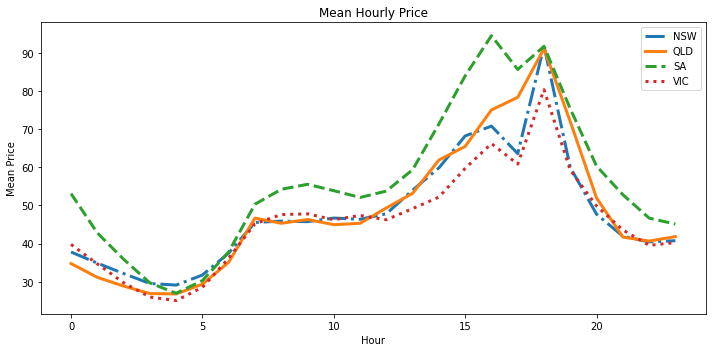

In [68]:
# Plot time series
plt.rcParams["figure.figsize"] = (10, 5)

plt.plot(mean_Hour.NSW1, label='NSW', 
         linewidth=3,linestyle="-.")
plt.plot(mean_Hour.QLD1, label='QLD', 
         linewidth=3,linestyle="-")
plt.plot(mean_Hour.SA1, label='SA', 
         linewidth=3,linestyle="--")
plt.plot(mean_Hour.VIC1, label='VIC', 
         linewidth=3,linestyle=":")

# Add title and labels

plt.title('Mean Hourly Price')
plt.xlabel('Hour')
plt.ylabel('Mean Price')

# Add legend

plt.legend()

# Auto space

plt.tight_layout()


# Display plot

plt.show() 